In [3]:
%matplotlib inline


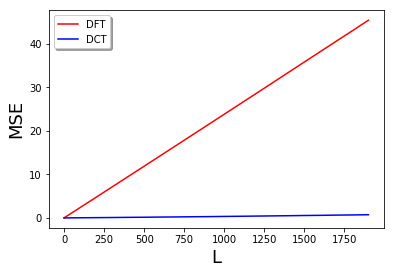

MSE of DFT = 
.............................
[0.0, 2.3759302373916253, 4.74630855129175, 7.117412212946723, 9.50606604970841, 11.879838316956661, 14.266331240548633, 16.654115603036313, 19.040933830677297, 21.428968407620612, 23.827110627909036, 26.2199639042152, 28.61192468463228, 31.018273920191742, 33.42120523151866, 35.82368937958922, 38.22218124228901, 40.625764771754056, 43.01797830595456, 45.427102301937936]

MSE of DCT = 
.............................
[0.0, 0.03039840793007337, 0.06215324065391853, 0.09098167441670581, 0.12854257745283743, 0.15602704891404867, 0.19694990184941394, 0.22446556503519632, 0.26692351401061887, 0.2977383588955047, 0.34135193982343554, 0.37930500311993065, 0.42069290870901416, 0.46546396533819345, 0.5047465277841521, 0.554706435717152, 0.5910442873154041, 0.6448087597135355, 0.6827063177486244, 0.7338949604913828]


In [4]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  4 20:18:40 2018
@author: Manish
"""

from __future__ import division
import numpy as np
#from numpy import linalg as LA
import matplotlib.pyplot as plt
import cmath
import math
import scipy.io.wavfile
from scipy.fftpack import dct,idct
from scipy.fftpack import fft,ifft
#import time

def meanSquaredRelativeError(s1,s2):
    arr = abs((s1-s2))
    sum = 0.0
    for i in range(len(arr)):
        var = np.float(abs(s1[i])*abs(s1[i]))
        if(s1[i] == 0):
            sum = sum + 1
        else:
            sum = sum + (arr[i]*arr[i])/var
    sum = sum/np.float(len(arr))
    return sum

def meanSquaredError(s1,s2):
    arr = abs((s1-s2))
    sum = 0.0
    for i in range(len(arr)):
        sum = sum + (arr[i]*arr[i])
    sum = sum/np.float(len(arr))
    return sum

def ceil(x):
    integer_part = np.int(x)
    float_part = x - integer_part
    ceil_part = x + (1-float_part)
    return int(ceil_part)

def floor(x):
    return np.int(x)

def DCTmat(x,N):
    W = []
    for k in range(N):
        w = []
        for n in range(N):
            w.append (2*(np.cos((np.pi*k*((2*n)+1))/(2*N))))
        W.append(w)
    W_ = np.array(W)
    x_ = np.array(x)
    X = np.matmul(W_,x_)
    return X  
    
def IDCTmat(X,N):
    alpha = []
    for i in range(N):
        if (i==0):
            alpha.append(0.5)
        else:
            alpha.append(1)
    W = []
    for n in range(N):
        w = []
        for k in range(N):
            w.append (alpha[k]*(np.cos((np.pi*k*((2*n)+1))/(2*N))))
        W.append(w)
    W_ = np.array(W)/float(N)
    X_ = np.array(X)
    x = np.matmul(W_,X_)
    return x

def haarMatrix(v):
    if (v == 1):
        return np.array([[1,1],[1,-1]])
    else:
        H_ = haarMatrix(v-1)
        I_ = math.pow(2,(v-1)/2)*np.identity(int(math.pow(2,v-1)))
        H = np.concatenate((np.kron(H_,np.array([1,1])),np.kron(I_,np.array([1,-1]))),axis = 0)
        return H
    return 0

def haarTransform(x,N):
    v = int(math.log(N,2)-1)
    H_N = haarMatrix(v+1)
    X_Haar = np.matmul(H_N,x)
    return X_Haar

def inverse_haarTransform(X_Haar,N):
    v = int(math.log(N,2)-1)
    H_N = haarMatrix(v+1)
    H_inv = (1.0/N)*H_N.transpose()
    x_ = np.matmul(H_inv,X_Haar)
    return x_

# Read a 1 sec audio file. This can be a bigger music file as well
[rate,data] = scipy.io.wavfile.read("audio3.wav", mmap=False)

# start time in seconds. t_start = 0 sec, since it is a 1 sec audio file
t_start = 0
t_end = (t_start + 1)

N = 44100
start_index = t_start * N
end_index = t_end * N
signal = data[start_index:end_index]
l_channel = signal[:,0]
r_channel = signal[:,1]

x = l_channel

XDFT = scipy.fftpack.fft(x)
xdft = scipy.fftpack.ifft(XDFT)
XDCT = scipy.fftpack.dct(x,norm = 'ortho')
xdct = scipy.fftpack.idct(XDCT,norm = 'ortho')

mseDFT = []
mseDCT = []
mseHaar = []
arrL = []

arrL = [100*i for i in range(20)]

for L in arrL:
    
    XDFT_m = []
    XDCT_m = []
    xdft_m = []
    xdct_m = []
    
    
    a1 = ((N-1-L)/2)
    a2 = (((N+1-L)/2))
    a3 = (((N-1+L)/2))
    a4 = (((N+1+L)/2))
    a5 = N
    
    
    l1 = np.int(ceil(a1))
    l2 = floor(a2)
    l3 = np.int(ceil(a3))
    l4 = floor(a4)
    l5 = a5
    
    for k in range (l1):
        XDFT_m.append(XDFT[k])
        
    for k in range (l2,l3):
        XDFT_m.append(0)
        
    for k in range (l4,l5):
        XDFT_m.append(XDFT[k])

    xdft_m = scipy.fftpack.ifft(XDFT_m)
            
    for k in range (N-L):
        XDCT_m.append(XDCT[k])
        
    for k in range (N-L,N):
        XDCT_m.append(0)
    
    xdct_m = scipy.fftpack.idct(XDCT_m,norm = 'ortho')
       
    mseDFT.append(meanSquaredError(xdft,xdft_m))
    mseDCT.append(meanSquaredError(xdct,xdct_m))


fig, ax = plt.subplots()
ax.plot(arrL, mseDFT, 'red', label='DFT')
ax.plot(arrL, mseDCT, 'blue', label='DCT')

ax.set_xlabel('L',fontsize = 18)
ax.set_ylabel('MSE',fontsize = 18)

legend = ax.legend(loc='upper left', shadow=True)

plt.show()

print('MSE of DFT = \n.............................')
print(mseDFT)
print('\nMSE of DCT = \n.............................')
print(mseDCT)